   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Accuracy with default n_estimators (10): 1.0000
Accuracy with 10 estimators: 1.0000
Accuracy with 50 estimators: 1.0000
Accuracy with 100 estimators: 1.0000
Accuracy with 150 estimators: 1.0000
Accuracy with 200 estimators: 1.0000
Accuracy with 300 estimators: 1.0000
Accuracy with 500 estimators: 1.0000


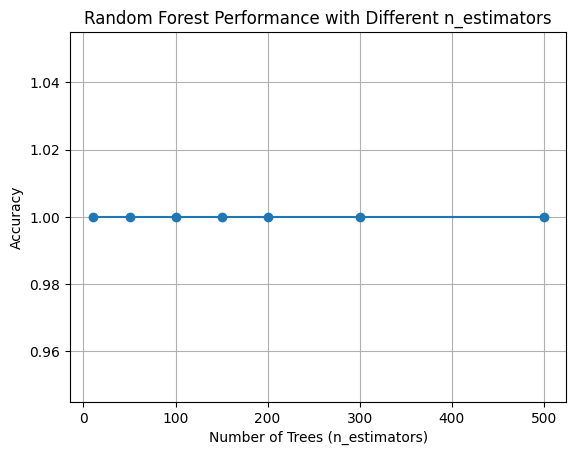

The best accuracy of 1.0000 was achieved with 10 estimators.
The best accuracy of 1.0000 was achieved with 10 estimators.


In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/iris (6).csv')

# Display the first few rows of the dataset
print(df.head())

# Split data into features (X) and target (y)
X = df.drop('species', axis=1)  # Features: all columns except the target
y = df['species']  # Target: the species column

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Build a Random Forest classifier with the default n_estimators (10)
rf_default = RandomForestClassifier(n_estimators=10, random_state=42)
rf_default.fit(X_train, y_train)

# Make predictions on the test set
y_pred_default = rf_default.predict(X_test)

# Calculate accuracy score with default model
accuracy_default = accuracy_score(y_test, y_pred_default)
print(f"Accuracy with default n_estimators (10): {accuracy_default:.4f}")

# 2. Fine-tune the model by changing n_estimators and evaluating the performance
# Test different numbers of trees (n_estimators)
n_estimators_list = [10, 50, 100, 150, 200, 300, 500]
accuracies = []

for n in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with {n} estimators: {accuracy:.4f}")

# Plot the results
plt.plot(n_estimators_list, accuracies, marker='o')
plt.title('Random Forest Performance with Different n_estimators')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Find the best score and corresponding n_estimators
best_accuracy = max(accuracies)
best_n_estimators = n_estimators_list[accuracies.index(best_accuracy)]
print(f"The best accuracy of {best_accuracy:.4f} was achieved with {best_n_estimators} estimators.")
# Find the best score and corresponding n_estimators
best_accuracy = max(accuracies)
best_n_estimators = n_estimators_list[accuracies.index(best_accuracy)]
print(f"The best accuracy of {best_accuracy:.4f} was achieved with {best_n_estimators} estimators.")



Confusion Matrix for 10 estimators:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


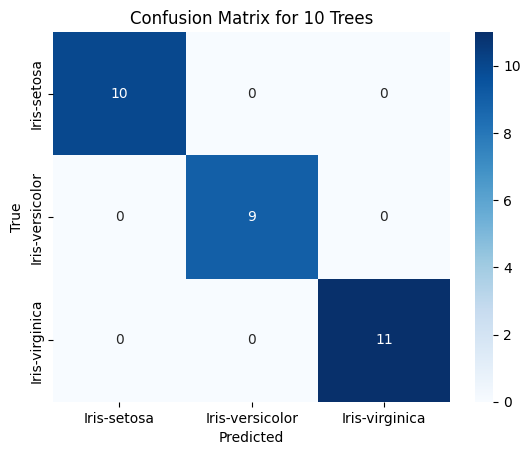

In [2]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Using the best model with the optimal n_estimators
best_rf = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
best_rf.fit(X_train, y_train)

# Predictions using the best model
y_pred_best = best_rf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Print confusion matrix
print(f"Confusion Matrix for {best_n_estimators} estimators:")
print(cm)

# Plot confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title(f"Confusion Matrix for {best_n_estimators} Trees")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
